In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.notebook_config import *
import random

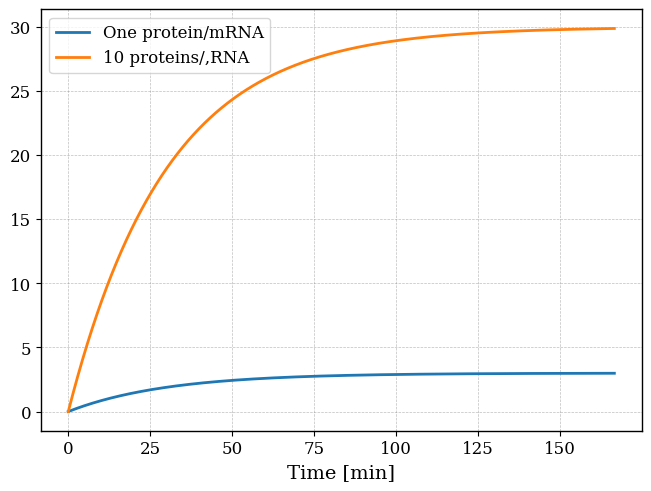

In [2]:
#Task 1

k_p, k_d = 1/600, 1/1800

def N(t, k_p, k_d):
    result = (k_p/k_d)*(1-np.exp(-k_d*t))
    return result

t = np.array([i for i in range(10000)])

proteins = np.array([N(i,k_p,k_d) for i in t])

proteins10 = np.array([N(i,k_p*10,k_d) for i in t])

t = t/60

plt.xlabel("Time [min]")

plt.plot(t, proteins, label="One protein/mRNA")
plt.plot(t, proteins10, label="10 proteins/,RNA")
plt.legend()

Text(0.5, 0, 'Time [min]')

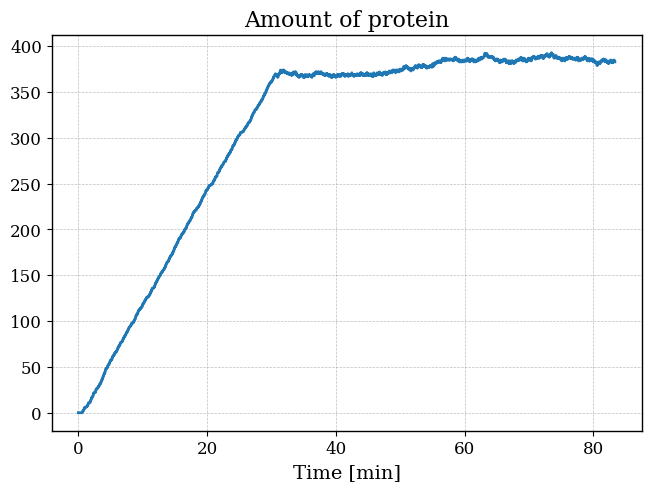

In [8]:
#Task 2

alpha, beta, L = 1, 1, 30

#codons = "AGCGCGCGGUCACAACGUUACUGUUAUCGAUCCGGUCGAAAAACUGCUGGCAGUGGGGCAUUACCUCGAAUCUACCGUCGAUAUUGCUGA"

q = np.random.rand(30)

def protein(alpha, beta, q, L, timesteps: int):
    counter = 0                         #protein counter
    ribo = np.zeros(L)                 #tracks where the ribosomes are, 1 = ribosome, 0 = no ribosome
    production = []                     #amount of protein over time
    age = []            #tracks age of protein
    index = np.array([i for i in range(30)])        #index of each codon
    time = [i for i in range(timesteps)]       #time over which we plot
    for step in range(timesteps):
        age = [i+1 for i in age]
        p = np.random.permutation(len(index))       #make sure that the q_i and index stay together after shuffling
        index, q = index[p], q[p]                   #shuffle the codons randomly
        for i in index:
            if i == 0:                  #Special case 1: the beginning
                if random.random() < alpha:
                    if ribo[0] == 0:
                        ribo[0] += 1
            if i == 29:                 #Special case 2: the end
                if random.random() < beta:
                    if ribo[29] == 1:
                        ribo[29] -= 1
                        counter += 1
                        age.append(0)
            if random.random() < q[i] and i != 29:
                if ribo[i] == 1 and ribo[i+1] == 0:
                    ribo[i+1] += 1
                    ribo[i] -= 1
        dead = [j>1799 for j in age]
        dead = len([i for i in dead if i == True])
        if dead == 1:
            counter -= 1
            age.pop(0)
        production.append(counter)
    return time, production

x,y = protein(alpha, beta, q, L, 5000)

x = [i/60 for i in x]

plt.plot(x,y)
plt.title("Amount of protein")
plt.xlabel("Time [min]")